In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf  # tensorflow 
import tensorflow.contrib.eager as tfe  # tensorflow eager 모드 import
 
tf.enable_eager_execution()  # eager 모드 활성화
tf.set_random_seed(777)  # seed 고정

print(tf.__version__)  # 텐서플로 버전 확인

1.12.0


In [2]:
# 데이터 준비

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
# tensorflow data api를 통해 학습시킬 값 담아줌
## .batch() : 한번에 학습시킬 사이즈(batch size) 조정
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

# 데이터 전처리 int -> float
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [4]:
# weight(가중치), bias(계수)
## 랜덤으로 정해줌

W1 = tf.Variable(tf.random_normal([2,1]), name='weight1')
b1 = tf.Variable(tf.random_normal([1]), name='bias1')

W2 = tf.Variable(tf.random_normal([2,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name= 'bias1')

W3 = tf.Variable(tf.random_normal([2,1]), name='weight3')
b3 = tf.Variable(tf.random_normal([1]), name='bias3')

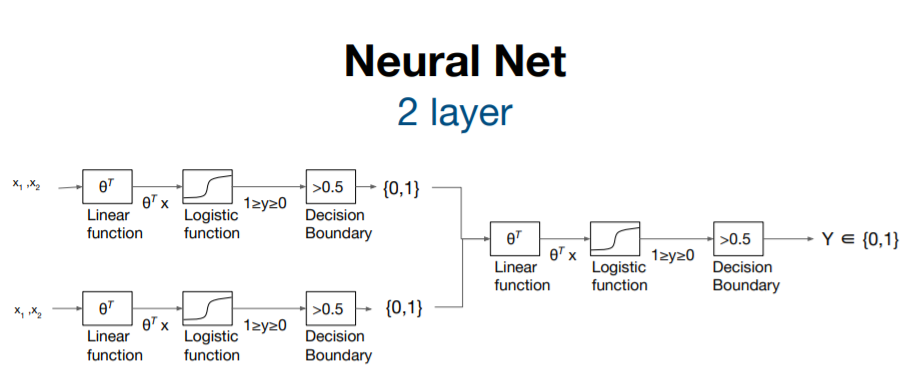

In [12]:
# nural network 생성
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)  # 1층 1번 로지스틱
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)  # 1층 2번 로지스틱
    layer3 = tf.concat([layer1, layer2], -1)  # 2층 만들기 위해 1층 합치기 axis는 -1
    layer3 = tf.reshape(layer3, shape=[-1,2])  # 2층 만들기 위해 shape 변경
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)  # 2층 로지스틱
    return hypothesis

# 손실 함수 생성
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1-labels) * tf.log(1-hypothesis))
    return cost

# optimizer는 경사하강법으로 학습률 0.01 지정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# 정확도 출력
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

# 경사하강법으로 최적 기울기, 계수 찾기
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [15]:
# 실행

EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels in tfe.Iterator(dataset):
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1,W2,W3,b1,b2,b3]))
        if step % 5000 == 0:
            print('lter : {}, Loss : {:.4f}'.format(step, loss_fn(neural_net(features),labels)))

x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data), y_data)
print('Testset Accuracy : {:.4f}'.format(test_acc))

lter : 0, Loss : 0.8460
lter : 5000, Loss : 0.6847
lter : 10000, Loss : 0.6610
lter : 15000, Loss : 0.6153
lter : 20000, Loss : 0.5722
lter : 25000, Loss : 0.5432
lter : 30000, Loss : 0.5211
lter : 35000, Loss : 0.4910
lter : 40000, Loss : 0.4416
lter : 45000, Loss : 0.3312
Testset Accuracy : 1.0000
